In [54]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#load data
sales_predictions = '/content/drive/MyDrive/Coding Dojo/Raw Data/sales_predictions.csv'
sales_df = pd.read_csv(sales_predictions)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Explore and Clean the data

In [57]:
# How many rows and columns?
sales_df.shape

(8523, 12)

In [58]:
# What are the datatypes of each variable?
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [59]:
# Are there any duplicates?
sales_df.duplicated().any()

False

There are no duplicate rows.

In [60]:
# Identify missing values
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
sales_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Decide how to address the missing values.

Item_Weight is missing 17.17% of its data.  However, the weight of an item is not correlated to any of our other data.  Given this information, the column Item_Weight will be deleted.

Outlet_Size is missing 28.28% of its data.  These null values can not be reasonably estimated utilizing any of the available data.  In order to keep the data within Outlet_Size, we will fill the null values with 'Unknown'.

In [62]:
sales_df.drop(columns = ['Item_Weight'], inplace = True)

In [63]:
sales_df['Outlet_Size'].fillna('Unknown', inplace = True)

In [64]:
#confirm that there are no missing values after addressing them
sales_df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and Fix any inconsistent categories of data

In [65]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [66]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [67]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].replace(['reg'], 'Regular')

In [68]:
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [69]:
sales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [70]:
sales_df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

For the sake of interpretation, we will replace 'High' with 'Large'.

In [71]:
sales_df['Outlet_Size'] = sales_df['Outlet_Size'].replace(['High'], 'Large')

In [72]:
sales_df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

In [73]:
sales_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [74]:
sales_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [75]:
# For any numerical columns, obtain the summary statistics of each
sales_df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Visualize the summary statistics using Box Plots and Histograms

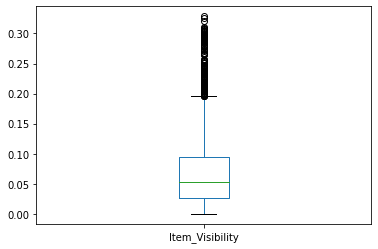

In [81]:
sales_df['Item_Visibility'].plot(kind = 'box');

Here we see that the Item_Visibility column has a large number of statistically significant outliers above the max.

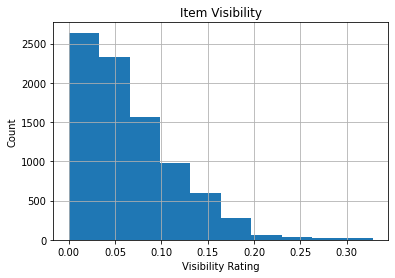

In [100]:
sales_df['Item_Visibility'].hist()
plt.title('Item Visibility')
plt.xlabel('Visibility Rating')
plt.ylabel('Count');

Skewed Right

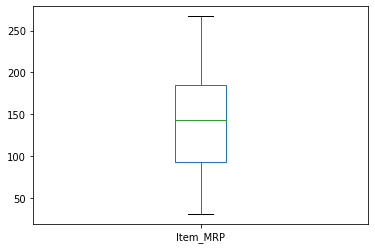

In [83]:
sales_df['Item_MRP'].plot(kind = 'box');

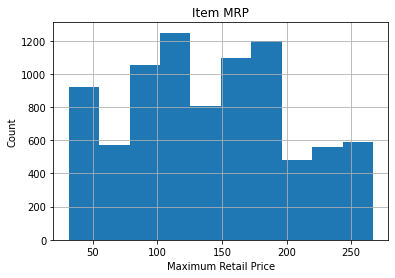

In [101]:
sales_df['Item_MRP'].hist()
plt.title('Item MRP')
plt.ylabel('Count')
plt.xlabel('Maximum Retail Price');

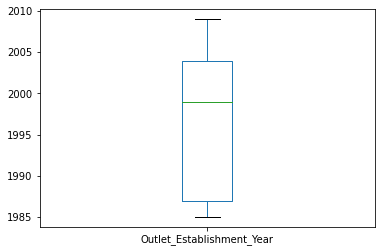

In [85]:
sales_df['Outlet_Establishment_Year'].plot(kind = 'box');

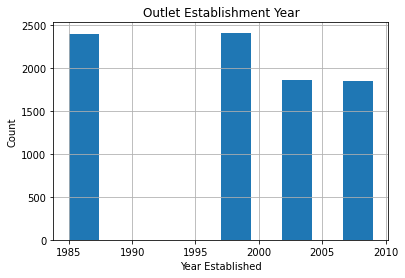

In [108]:
sales_df['Outlet_Establishment_Year'].hist(bins = 10)
plt.title('Outlet Establishment Year')
plt.ylabel('Count')
plt.xlabel('Year Established');

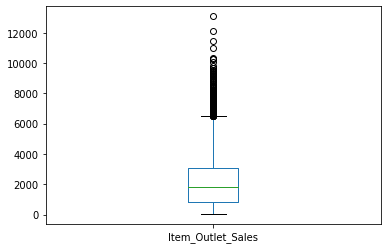

In [87]:
sales_df['Item_Outlet_Sales'].plot(kind = 'box');

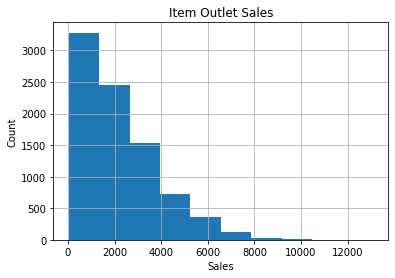

In [109]:
sales_df['Item_Outlet_Sales'].hist()
plt.title('Item Outlet Sales')
plt.ylabel('Count')
plt.xlabel('Sales');

Here we see that the Item_Outlet_Sales column also has a large number of statistically significant outliers above the max.

Skewed Right

Analyze the contents of Categorical Columns using Bar charts

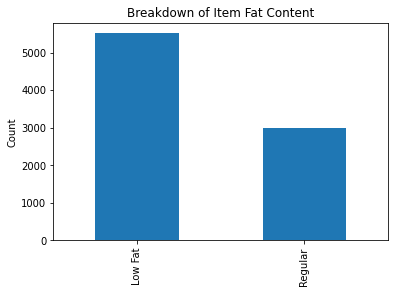

In [89]:
fat_content = sales_df['Item_Fat_Content'].value_counts()
fat_content.plot(kind = 'bar')
plt.title('Breakdown of Item Fat Content')
plt.ylabel('Count');

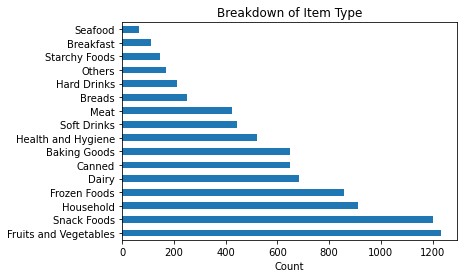

In [91]:
item_kind = sales_df['Item_Type'].value_counts()
item_kind.plot(kind = 'barh')
plt.title('Breakdown of Item Type')
plt.xlabel('Count');

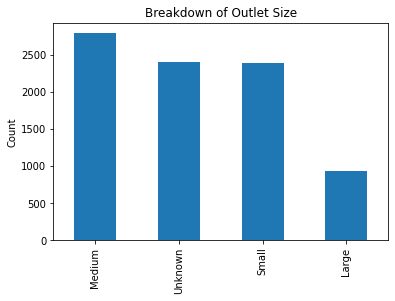

In [92]:
size = sales_df['Outlet_Size'].value_counts()
size.plot(kind = 'bar')
plt.title('Breakdown of Outlet Size')
plt.ylabel('Count');

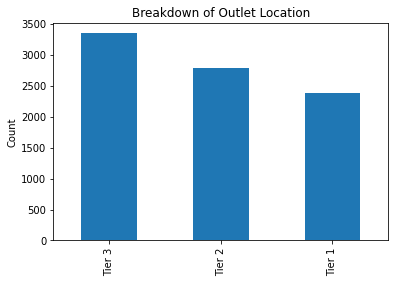

In [94]:
location = sales_df['Outlet_Location_Type'].value_counts()
location.plot(kind = 'bar')
plt.title('Breakdown of Outlet Location')
plt.ylabel('Count');

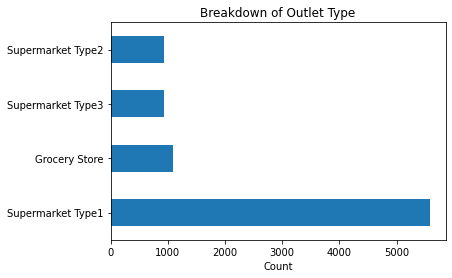

In [95]:
outlet_kind = sales_df['Outlet_Type'].value_counts()
outlet_kind.plot(kind = 'barh')
plt.title('Breakdown of Outlet Type')
plt.xlabel('Count');

Explore Correlation Between Numerical Data

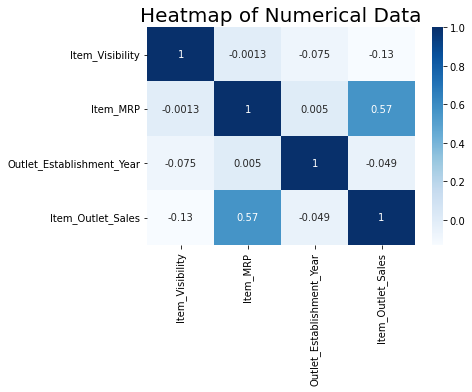

In [76]:
sales_corr = sales_df.corr()
sns.heatmap(data = sales_corr , cmap = 'Blues', annot = True)
plt.title('Heatmap of Numerical Data', fontsize = 20);

There is a moderate positive correlation between Item_MRP and Item_Outlet_Sales.

There are no other significant correlations within sales_df.

Further exploration of Significant Correlations

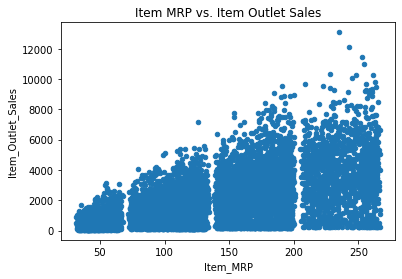

In [80]:
sales_df.plot.scatter(x = 'Item_MRP', y = 'Item_Outlet_Sales')
plt.title('Item MRP vs. Item Outlet Sales');

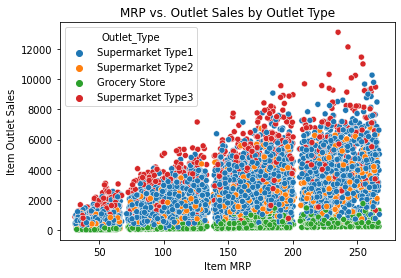

In [114]:
sns.scatterplot(data = sales_df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Type')
plt.title('MRP vs. Outlet Sales by Outlet Type')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales');

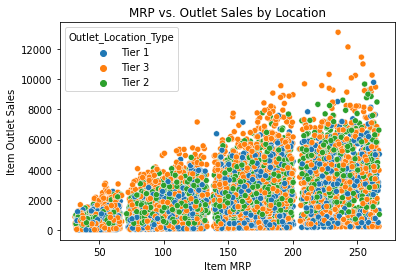

In [115]:
sns.scatterplot(data = sales_df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Location_Type')
plt.title('MRP vs. Outlet Sales by Location')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item MRP');

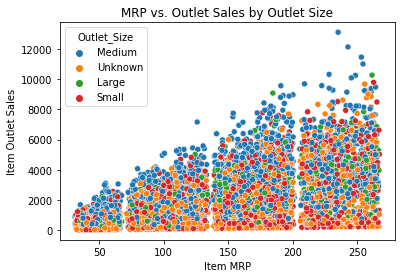

In [116]:
sns.scatterplot(data = sales_df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Size')
plt.title('MRP vs. Outlet Sales by Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item MRP');

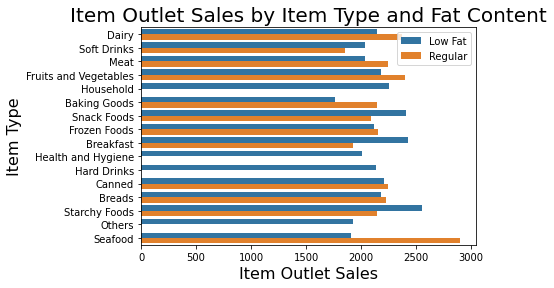

In [135]:
sns.barplot(data = sales_df, x = 'Item_Outlet_Sales', y = 'Item_Type', hue = 'Item_Fat_Content', ci = None)
plt.legend(loc = 'best')
plt.title('Item Outlet Sales by Item Type and Fat Content', fontsize = 20)
plt.ylabel('Item Type', fontsize = 16)
plt.xlabel('Item Outlet Sales', fontsize = 16);


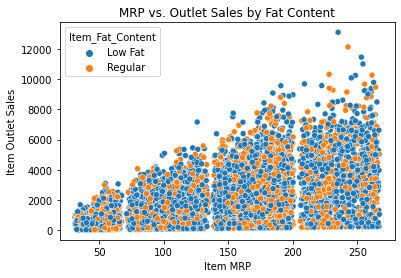

In [139]:
sns.scatterplot(data = sales_df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content')
plt.title('MRP vs. Outlet Sales by Fat Content')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales');